In [ ]:
from music21 import *

In [ ]:
#defining function to read MIDI files
def read_midi(file):

    print("Loading Music File:",file)

    notes=[]
    notes_to_parse = None

    #parsing a midi file
    midi = converter.parse(file)

    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:

        #select elements of only piano
        if 'Piano' in str(part):

            notes_to_parse = part.recurse()

            #finding whether a particular element is note or a chord
            for element in notes_to_parse:

                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))

                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [ ]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path='/content/midi_files/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

all_notes = []

# Reading and processing each MIDI file
for file in files:
    midi_notes = read_midi(path + file)
    all_notes.extend(midi_notes)

# Convert the list of notes/chords to a NumPy array
notes_array = np.array(all_notes)
print(notes_array)

Loading Music File: /content/midi_files/youre only lonely L.mid
Loading Music File: /content/midi_files/Pirates of the Caribbean .mid
Loading Music File: /content/midi_files/Never-Gonna-Give-You-Up-3.mid
['D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4'
 'D4' 'D4' 'D4' 'D4' 'D4' '2' 'D4' 'D4' 'D4' 'D4' '2' 'D4' 'D4' '2' 'A3'
 'C4' '2.5.9' '2' '2.5.9' '2' '2' '2.5.9' '9.0.4' '0' '10.2.5' '10'
 '10.2.5' '10' '10' '10.2.5' '2.7' '10' '9.0.4' '9' '9.0.4' '9' '9' '9.2'
 '7.0' '9' '9.0' '2' '9.2' '2' '2' 'A3' 'C4' '2' '10.2.5' '10' '10.2.5'
 '10' '10' '10.2' '4.10' '10' '5.9.0' '10' '5.9.0' '10' '10' '0.5' '7.0'
 '10' '9.0.4' '9' '9.0.4' '9' '9' '9.2' '7.0' '9' '2.5.9' '2' '2' '2' 'A3'
 'C4' '2' '2.5.9' '2' '2.5.9' '2' '2' '9.2' '5.9' '2' '7.10.2' '10'
 '7.10.2' '10' '10' '2.7' '9.2' '10' '7.10.2' '7' '7.10.2' '7' '7' '5.9'
 '4.7' '7' '5.9' '2' 'D4' '2' '2' 'D4' 'E4' '2' '10.2.5' '10' '10.2.5'
 '10' '10' '7.10.2' '10' '5.9' '2' 'D4' '2' '2' 'D4' 'F4' '2' '9.1.4' '9'
 '9.

In [ ]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

18


(array([9., 1., 1., 2., 0., 1., 2., 1., 0., 1.]),
 array([  1. ,  29.4,  57.8,  86.2, 114.6, 143. , 171.4, 199.8, 228.2,
        256.6, 285. ]),
 <BarContainer object of 10 artists>)

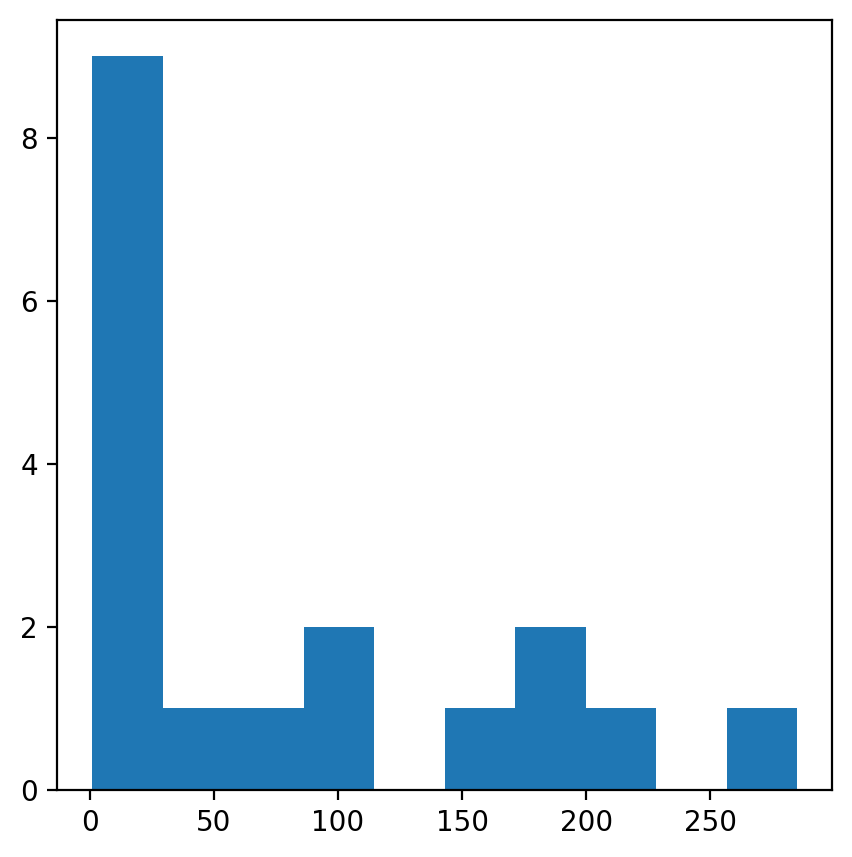

In [ ]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [ ]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

8


In [ ]:
import numpy as np

# Example of frequent_notes
frequent_notes = [8]  # Sample list of frequent notes

# Assuming notes_array is a list of lists with different lengths
notes_array = ['D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4' 'D4'
 'D4' 'D4' 'D4' 'D4' 'D4' '2' 'D4' 'D4' 'D4' 'D4' '2' 'D4' 'D4' '2' 'A3'
 'C4' '2.5.9' '2' '2.5.9' '2' '2' '2.5.9' '9.0.4' '0' '10.2.5' '10'
 '10.2.5' '10' '10' '10.2.5' '2.7' '10' '9.0.4' '9' '9.0.4' '9' '9' '9.2'
 '7.0' '9' '9.0' '2' '9.2' '2' '2' 'A3' 'C4' '2' '10.2.5' '10' '10.2.5'
 '10' '10' '10.2' '4.10' '10' '5.9.0' '10' '5.9.0' '10' '10' '0.5' '7.0'
 '10' '9.0.4' '9' '9.0.4' '9' '9' '9.2' '7.0' '9' '2.5.9' '2' '2' '2' 'A3'
 'C4' '2' '2.5.9' '2' '2.5.9' '2' '2' '9.2' '5.9' '2' '7.10.2' '10'
 '7.10.2' '10' '10' '2.7' '9.2' '10' '7.10.2' '7' '7.10.2' '7' '7' '5.9'
 '4.7' '7' '5.9' '2' 'D4' '2' '2' 'D4' 'E4' '2' '10.2.5' '10' '10.2.5'
 '10' '10' '7.10.2' '10' '5.9' '2' 'D4' '2' '2' 'D4' 'F4' '2' '9.1.4' '9'
 '9.1.4' '9' '9' '2.5' '11.2' '9' '9.1.4' '9' '9' '9' 'A4' 'C5' '9'
 '2.5.9' '2' '2.5.9' '2' '2' '2.5.9' '9.0.4' '0' '10.2.5' '10' '10.2.5'
 '10' '10' '10.2.5' '2.7' '10' '9.0.4' '9' '9.0.4' '9' '9' '9.2' '7.0' '9'
 '9.0' '2' '9.2' '2' '2' 'A4' 'C5' '2' '10.2.5' '10' '10.2.5' '10' '10'
 '10.2' '4.10' '10' '5.9.0' '5' '5.9.0' '5' '5' '0.5' '7.0' '5' '0.4' '0'
 '0.4' '0' '9' '9.2' 'C5' '9' '2.5.9' '2' '2' '2' 'A4' 'C5' '2' '2.5.9'
 '2' '2.5.9' '2' '2' '9.2' '5.9' '2' '7.10.2' '10' '7.10.2' '10' '10'
 '2.7' '9.2' '10' '7.10.2' '7' '7.10.2' '7' '7' '5.9' '4.7' '7' '5.9' '2'
 'D5' '2' '2' 'D5' 'E5' '2' '10.2.5' '10' '10.2.5' '10' '10' '7.10.2' '10'
 '5.9' '2' 'D5' '2' '2' 'D5' 'F5' '2' '9.1.4' '9' '9.1.4' '9' '9' 'D5'
 'C#5' '9' '9.2' '2' '9.2' '2' '9.0.4' '0' '0.2.5' '0' 'F5' '0' 'F5'
 '7.10.2' '10' '9.2' '9' 'F5' '9' '9' '5.9' '9.2' '9' 'A4' '9' '9' '9' '9'
 '7.10.2' '7' '7' '7' '7.10' '10.2' '7' 'B-4' '7' '7' '7' '7' '1.4' '9'
 '1.4' '9' '2.7' '9' '9' '1.5.9' '9' '9' '9' 'F4' 'G4' '9' '2.5.9' '2'
 '2.5.9' '2' '2' '2.5.9' '2' '10.2.5' '2' '2.5.9' '2' '2' '2' '2' '0.4.7'
 '0' '0.4.7' '0' '0' '0.4.7' '0' '0.4.7' '5' '5.9.0' '5' '5' '5' '5'
 '2.5.9' '2' '2.5.9' '2' '2' '2.5.9' '2' '10.2.5' '2' '2.5.9' '2' '2' '2'
 '2' '1.4.7' '9' '1.5' '9' '9' '4.9' '9' '2.5.9' '2' '2' '2' 'D4' 'E4' '2'
 '2.5.9' '2' '2' '2' 'G4' 'A4' '2' '7.0' '0' '0.5' '0' '0' '0.4' '0' '0'
 '5.9.0' '5' '7.9.0' '5' '5' '9.0' '5' '5' '0.4.7' '0' '0' '0' 'F4' '0'
 'G4' '0' '5.9.0' '5' '5' '5' 'G4' '5' 'F4' '5' '1.4' '9' '1.5' '9' '9'
 '1.4' '9' '9' '2.5.9' '2' '2' '2' 'E4' 'C4' '2' '2.5.9' '2' '2' '2' 'D5'
 '2' 'E5' '2' '2.5.9' '2' '2' '2' 'E5' '2' 'F5' '2' '7.0' '0' '0.5' '0'
 '0' '7.0' '0' '0' '5.9' '5' '7.0' '5' '5' '0.5' '5' '5' '10.2.5' '10'
 '10' '10' 'D5' '10' 'E5' '10' '2.5.9' '2' '7.9.2' '2' '2' '9.2' '2' '2'
 '10.2' '7' '10.2' '7' '7' '7.10' '7' '7' '5.9' '9' '9' '9' 'G5' '9' 'E5'
 '9' '9.2' '9' '9' '9' 'E5' '9' 'C#5' '9' '2.5.9' '2' '2' '2' '2' '2'
 '7.10.2' '7' '7' '7' '7' '7' '5.9.0' '5' '5.9.0' '5' '5' '5.9.0' '5'
 '9.0.4' '0' 'G5' '0' '0' '0' '0' '7.10.2' '7' '7' '7' '7' '7' '2.5.9' '9'
 '9' '9' '9' '9' '5.9' '9' '7.9' '9' '9' '4.9' '9' '9' '2.5.9' '2' '2'
 'D5' '2' 'E5' '2' 'F5' '2' '2.5.9' '2' '2' 'D5' '2' 'E5' '2' 'F5' '2'
 '10.2.5' '10' '10' 'D5' '10' 'E5' '10' 'F5' '10' '5.9.0' '5' '5.9.0' '5'
 '5' '0.5' '5' '5' '9.0.4' '0' 'G5' '0' '0' '0' '0' '7.10.2' '7' '7' '7'
 '7' '7' '2.5.9' '9' '9' '9' '9' '9' '5.9' '9' '7.9' '9' '9' '4.9' '9' '9'
 '2.5.9' '2' '2' '2' '2' 'D4' '2' 'D4' '2']

# Finding the maximum length of the lists
max_len = max(len(notes) for notes in notes_array)

# Padding the lists to have the same length
new_music = []
for notes in notes_array:
    temp = []
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)
    # Padding with zeros if needed
    while len(temp) < max_len:
        temp.append(0)
    new_music.append(temp)

# Convert the list of lists to a NumPy array
new_music = np.array(new_music)
print(new_music)

[[0 0 0 ... 0 0 0]]


In [ ]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):

        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]

        x.append(input_)
        y.append(output)

x=np.array(x)
y=np.array(y)

In [ ]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [ ]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)

x_seq = np.array(x_seq)

In [ ]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y))
y_seq=np.array([y_note_to_int[i] for i in y])

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [ ]:
def lstm():
  model = Sequential()
  model.add(LSTM(128,return_sequences=True))
  model.add(LSTM(128))
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(n_vocab))
  model.add(Activation('softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
  return model

In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()

#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True))

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

#model.add(Conv1D(256,5,activation='relu'))
model.add(GlobalMaxPool1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           100       
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 16, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [ ]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [ ]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=50, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/50
8/9 [=========================>....] - ETA: 0s - loss: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.00000, saving model to best_model.h5
9/9 [==============================] - 3s 163ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/50
1/9 [==>...........................] - ETA: 0s - loss: 0.0000e+00

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/9 [=========================>....] - ETA: 0s - loss: 0.0000e+00
Epoch 2: val_loss did not improve from 0.00000
9/9 [==============================] - 1s 77ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
8/9 [=========================>....] - ETA: 0s - loss: 0.0000e+00
Epoch 3: val_loss did not improve from 0.00000
9/9 [==============================] - 1s 74ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/50
8/9 [=========================>....] - ETA: 0s - loss: 0.0000e+00
Epoch 4: val_loss did not improve from 0.00000
9/9 [==============================] - 1s 78ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
8/9 [=========================>....] - ETA: 0s - loss: 0.0000e+00
Epoch 5: val_loss did not improve from 0.00000
9/9 [==============================] - 1s 73ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/50
9/9 [==============================] - ETA: 0s - loss: 0.0000e+00
Epoch 6: val_loss did not improve from 0.00000
9/9 [==========

In [ ]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

In [ ]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(10):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]

print(predictions)

1/1 [==============================] - 0s 42ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x))
predicted_notes = [x_int_to_note[i] for i in predictions]

In [ ]:
from music21 import note, chord, stream, instrument

def convert_to_midi(prediction_output):
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        # Convert pattern to string
        pattern_str = str(pattern)

        # pattern is a chord (if it contains '.' or is a digit)
        if ('.' in pattern_str) or pattern_str.isdigit():
            notes_in_chord = pattern_str.split('.')
            notes = []
            for current_note in notes_in_chord:
                cn = int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)

            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)

        # pattern is a single note
        else:
            new_note = note.Note(pattern_str)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1

    # Create a MIDI stream from the output notes
    midi_stream = stream.Stream(output_notes)

    # Write the MIDI file
    midi_stream.write('midi', fp='/content/generated_music.mid')

In [ ]:
convert_to_midi(predicted_notes)